# Brazilian E-Commerce Public Dataset by Olist Investigate
## Table of content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#coll">Data Collection and Prepration</a></li>
<li><a href="#expl">Data Exploring</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li> 
<li><a href="#conc">Conclusions</a></li>
</ul>
<a id='intro'></a>

## Introduction 
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.
in this report we will focuse on some features of order (items orderd, reviews , payment and product category of items)<br>
and two Questions to answer:
- What are item scores for each products category?
- From previous question for top 5 products category what is avergae payment value in each item scores?

<a id='coll'></a>
## Data Collection and Prepration

In [365]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%matplotlib inline 

In [366]:
#read data
order_items_df = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
payments_df = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
reviwes_df = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')
products_df = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')

In [367]:
#join reviwes_df with order item dataframe'order_items_df' 
df = order_items_df.merge(reviwes_df, on='order_id' ,how='inner')

In [368]:
#join payments_df with order item dataframe'order_items_df' 
df = df.merge(payments_df , on='order_id',how='inner')

In [369]:
#join products_df with joined dataframe 'df' above
df = df.merge(products_df , on='product_id',how='left')

In [370]:
#show few rows of df
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,...,2,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,...,3,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,...,5,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,...,2,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,...,3,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [371]:
#show information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 25 columns):
order_id                      118315 non-null object
order_item_id                 118315 non-null int64
product_id                    118315 non-null object
seller_id                     118315 non-null object
shipping_limit_date           118315 non-null object
price                         118315 non-null float64
freight_value                 118315 non-null float64
review_id                     118315 non-null object
review_score                  118315 non-null int64
review_comment_title          14089 non-null object
review_comment_message        50665 non-null object
review_creation_date          118315 non-null object
review_answer_timestamp       118315 non-null object
payment_sequential            118315 non-null int64
payment_type                  118315 non-null object
payment_installments          118315 non-null int64
payment_value                 118315 non-null

In [389]:
#remove columns not needed
df = df.drop(columns=['shipping_limit_date','price','freight_value',
              'payment_type','product_width_cm',
              'review_creation_date','review_comment_title', 
              'review_comment_message','review_creation_date',
              'review_answer_timestamp','product_name_lenght' , 
              'product_description_lenght','product_photos_qty','product_length_cm', 
              'product_height_cm', 'product_width_cm',])

In [390]:
#show df after remove columns
df.head()

,order_id,order_item_id,product_id,seller_id,review_id,review_score,payment_sequential,payment_installments,payment_value,product_category_name,product_weight_g
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,6322c405c0f34bf3ad870fd1a6b1fced,5,1,4,97.32,cama_mesa_banho,1383.0
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,00800678dcf28b0ea0caef2147b6945d,1,1,1,152.77,perfumaria,468.0
28,00130c0eee84a3d909e75bc08c5c3ca1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,4ff9a24999699f7104ed23fec2563351,5,1,1,35.84,alimentos,150.0
54,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,048baba3f11436d12b06dab572aafc21,1,1,2,51.10,beleza_saude,1614.0
57,002175704e8b209f61b9ad5cfd92b60e,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,78412bf6c796b43df999fd87750d28ea,4,1,3,123.11,audio,588.0


In [391]:
#check duplication 
df.duplicated().sum()

0

In [392]:
#check nulls values in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12071 entries, 12 to 118274
Data columns (total 11 columns):
order_id                 12071 non-null object
order_item_id            12071 non-null int64
product_id               12071 non-null object
seller_id                12071 non-null object
review_id                12071 non-null object
review_score             12071 non-null int64
payment_sequential       12071 non-null int64
payment_installments     12071 non-null int64
payment_value            12071 non-null float64
product_category_name    12071 non-null object
product_weight_g         12071 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


As we see above we have missing values in product_category_name and product_weight_g columns and because both columns have few missing values in each column I decide to remove it.

In [393]:
df = df.dropna()

<a id='expl'></a>
## Data Exploring

In [394]:
#show some statistics of numaric columns
df.describe()

,order_item_id,review_score,payment_sequential,payment_installments,payment_value,product_weight_g
count,12071.000000,12071.000000,12071.000000,12071.000000,12071.000000,12071.000000
mean,1.250104,3.711043,1.056251,3.065280,199.562301,2117.702013
std,0.773737,1.605297,0.374056,2.842548,310.941829,3762.823861
min,1.000000,1.000000,1.000000,1.000000,0.050000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,67.630000,292.500000
50%,1.000000,5.000000,1.000000,2.000000,122.700000,650.000000
75%,1.000000,5.000000,1.000000,4.000000,210.350000,1800.000000
max,13.000000,5.000000,12.000000,20.000000,7274.880000,30000.000000


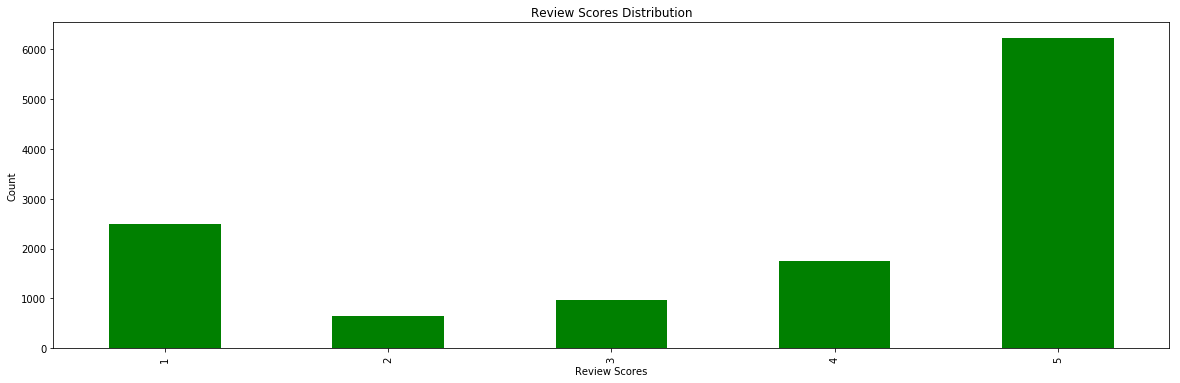

In [395]:
#review score distribution
df.review_score.value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Review Scores Distribution')
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.show();

If we see the bar chart above the 3 highest scores are 1, 4 and 5

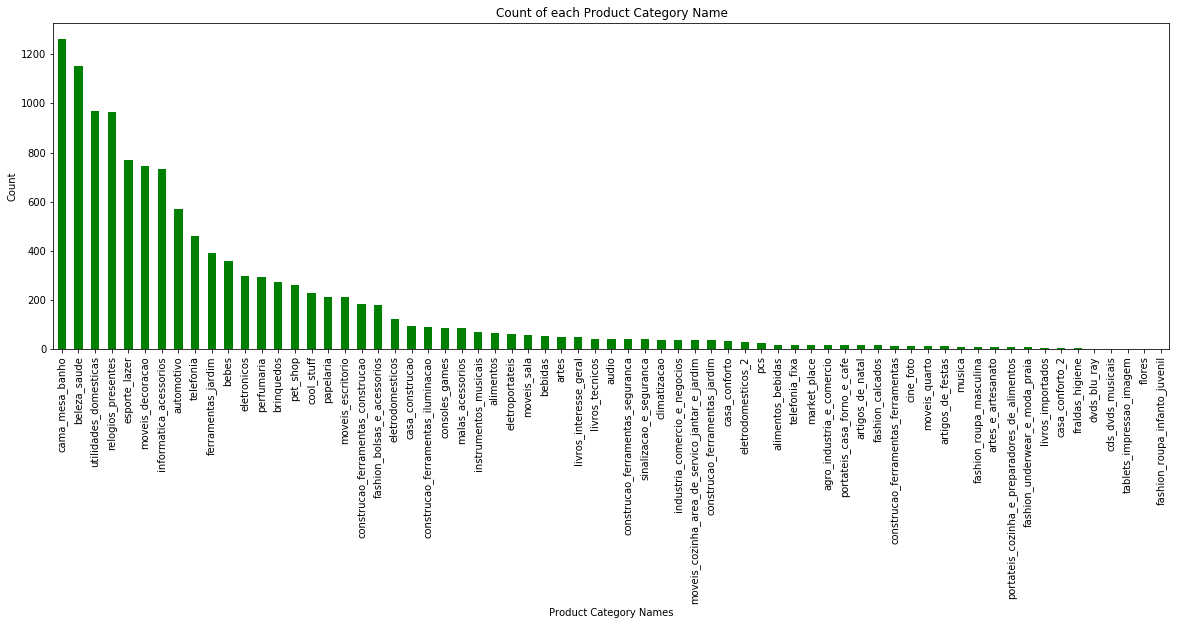

In [396]:
# Count of each Product Category Name
df.product_category_name.value_counts().sort_values(ascending=False).plot(kind='bar',color='green')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)
plt.title('Count of each Product Category Name')
plt.xlabel('Product Category Names')
plt.ylabel('Count')
plt.show();

The trendy product category name is cama_mesa_banho

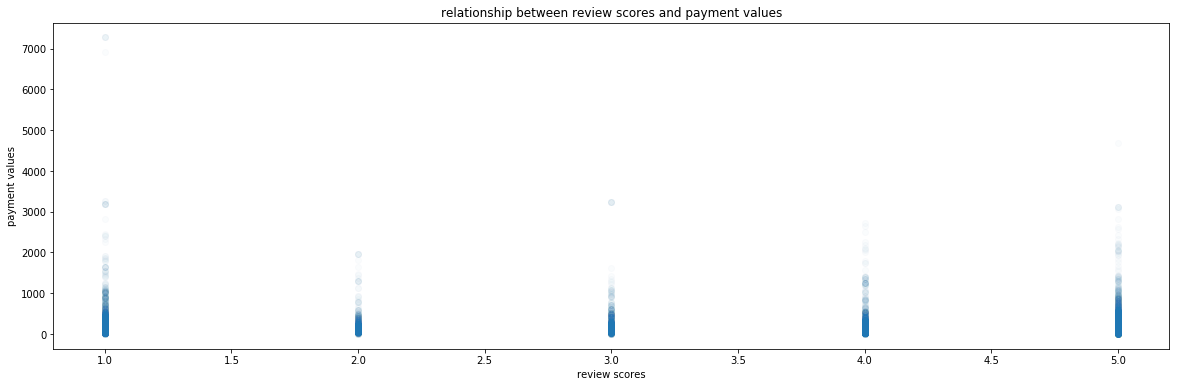

In [397]:
#relationship between review_score and payment_value
plt.scatter(df.review_score,df.payment_value,alpha=0.02);
plt.title('relationship between review scores and payment values')
plt.xlabel('review scores')
plt.ylabel('payment values')
plt.show();

If we see scatter plot above and see 1 secore there is outlier point 
may this helpful point to see if there are payments with high cost item and have lowest score 1 compared to score 5

<a id='q1'></a>
## Question 1
What are item scores for each products category.

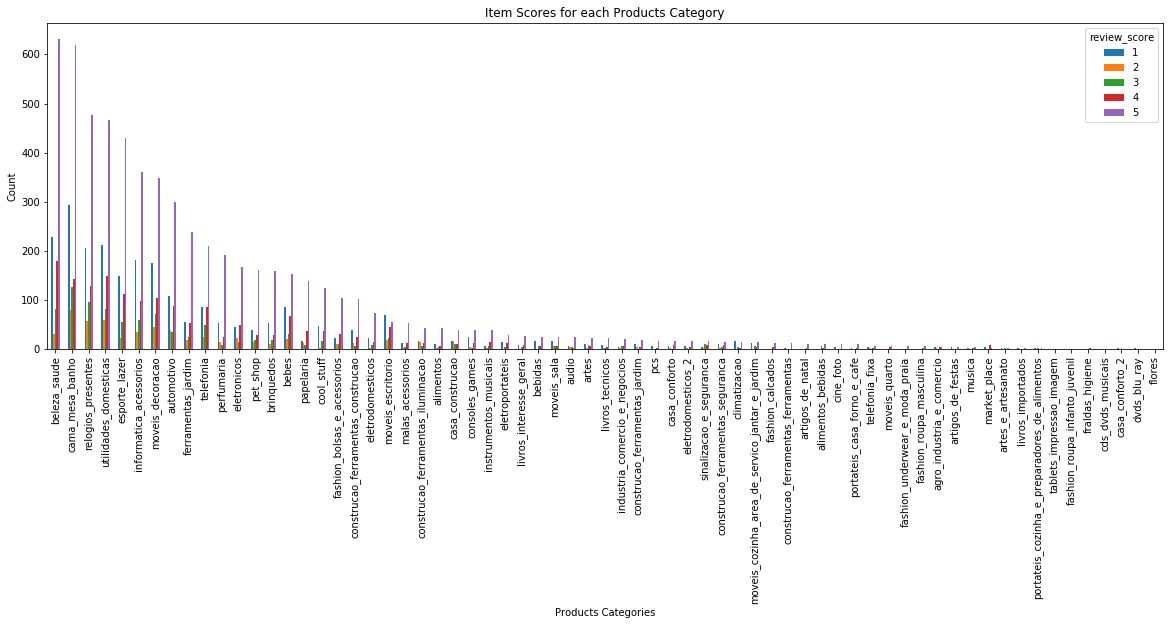

In [398]:
df.groupby('product_category_name')[
    'review_score'].value_counts().unstack().sort_values(by = 5,ascending=False).plot(kind='bar')
plt.title('Item Scores for each Products Category')
plt.xlabel('Products Categories')
plt.ylabel('Count')
plt.show();

<a id='q2'></a>
## Question 2
From previous question for top 5 products category what is avergae payment value in each item scores?

In [399]:
# top 5 products category 
top_5_products_category = df.groupby('product_category_name')[
    'review_score'].value_counts().unstack().sort_values(by = 5,ascending=False).index[:5]

In [400]:
#for top 5 calc avergae payment value in each item scores
ave_payemnt_top_5_product ={}
for n in top_5_products_category:
    for m in np.arange(1,6):
        score = str(m)
        ave_payemnt_top_5_product[n+'_'+score]=df[(df['product_category_name']==n) & (df['review_score']==m )].payment_value.mean()

In [401]:
#show top 5 prod avergae payment value in each item scores
ave_payemnt_top_5_product

{'beleza_saude_1': 209.3937991266378,
 'beleza_saude_2': 198.22548387096774,
 'beleza_saude_3': 158.30469135802466,
 'beleza_saude_4': 196.28027777777785,
 'beleza_saude_5': 165.01063291139246,
 'cama_mesa_banho_1': 171.3461904761905,
 'cama_mesa_banho_2': 206.0353164556963,
 'cama_mesa_banho_3': 154.8588095238096,
 'cama_mesa_banho_4': 152.0775694444444,
 'cama_mesa_banho_5': 147.92425806451607,
 'relogios_presentes_1': 234.2773429951692,
 'relogios_presentes_2': 215.81929824561405,
 'relogios_presentes_3': 273.85443298969074,
 'relogios_presentes_4': 222.75687500000006,
 'relogios_presentes_5': 214.30439075630207,
 'utilidades_domesticas_1': 223.6775471698112,
 'utilidades_domesticas_2': 219.0905084745764,
 'utilidades_domesticas_3': 235.401111111111,
 'utilidades_domesticas_4': 187.79838926174483,
 'utilidades_domesticas_5': 151.39220556745187,
 'esporte_lazer_1': 196.71228187919465,
 'esporte_lazer_2': 120.93136363636364,
 'esporte_lazer_3': 209.06071428571417,
 'esporte_lazer_4': 

<a id='conc'></a>
## Conclusions

- The scores that mostly select is either 1 ,4 and 5.
If we see item scores for each products category chart scores 1,4 and 5 are top mostly.
So customers review score selection mostly either bad '1' or good 4,5 two choises for rating only thay select.
<br>
- Top 5 products category avergae payment value in each item scores:<br>
If we see in all products category avergae payment value in score 1 has high average and decrease in 5 score. which is make a sense and tell us that one affected feature for scoring is payment value.

